# CIRCUIT DISCOVERY

<img src="main.png" alt="Circuit Discovery" style="height: 200px;"/>

In [4]:
import os
import matplotlib.pyplot as plt  
from control.matlab import *
from control import *
from tqdm import tqdm
import matplotlib
import numpy as np
import scipy
import pandas as pd
from numpy.random import choice

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

### State space systems

State-space realizations of linear time-invariant (LTI) systems:

$\frac{dx}{dt} = A x + B u$

$y = C x + D u$

where u is the input, y is the output, and x is the state.

$G(s) = \frac{\text{num}(s)}{\text{den}(s)}
     = \frac{a_0 s^m + a_1 s^{m-1} + \cdots + a_m}
            {b_0 s^n + b_1 s^{n-1} + \cdots + b_n},$

In [5]:
G1 = tf2ss([1, 3, 1], [1, 1, 1])
G2 = tf2ss([1, 2, 1], [1, 1, 1])

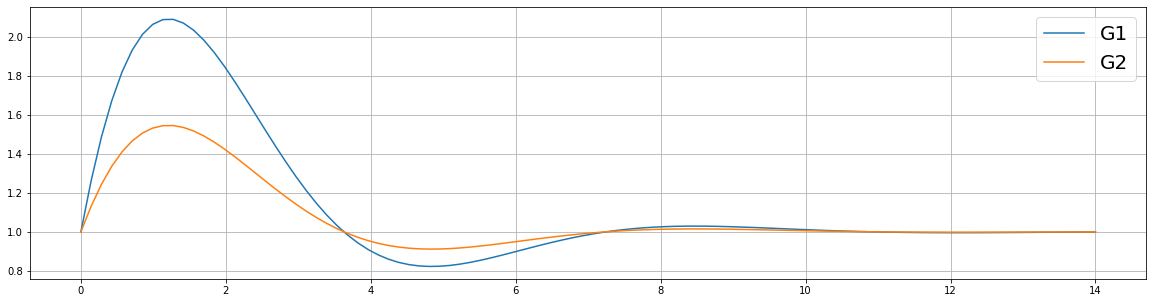

In [6]:
g1, T = step(G1)
g2, T = step(G2)
plt.plot(T.T, g1.T);
plt.plot(T.T, g2.T);
plt.grid();
plt.legend(['G1', 'G2'], fontsize=20);

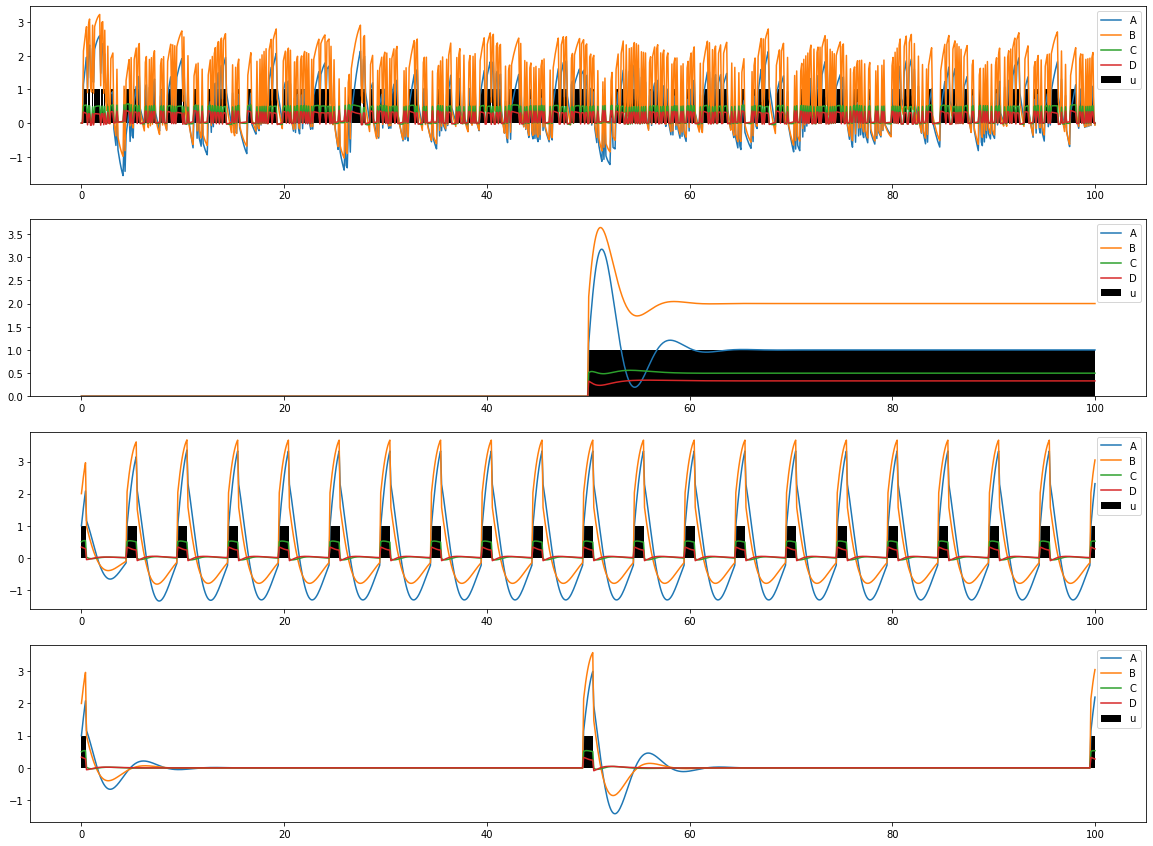

In [7]:

fig, axs = plt.subplots(4, 1, figsize=(20, 15))

time = np.linspace(start=0, stop=100, num=1000)

u1 = [1 if (i>25) & (i<75) else 0 for i in time]
u2 = [1 if i>50 else 0 for i in time]
u3 = [1 if round(i, 0)%5==0 else 0 for i in time]
u4 = [1 if round(i, 0)%50==0 else 0 for i in time]
u5 = np.concatenate([[0]*500, [0, 1]*250])
u1 = np.round(np.random.uniform(low=0.0, high=1.0, size=len(time)))

for i, u in enumerate([u1, u2, u3, u4]):
# for i, u in enumerate([u5]):
#     axs[i].plot(time, u, color='black', linewidth=5);
    axs[i].bar(time, u, color='black', width=0.1);

    A = series(G1, G2)
    B = parallel(G1, G2)
    C = feedback(G1, G2, sign=-1)
    D = feedback(C, G1, sign=-1)
    for x in [A, B, C, D]:
        T, yout, xout = forced_response(x, time, u)
        axs[i].plot(T.T, yout.T);
        axs[i].legend(['A', 'B', 'C', 'D', 'u'])

# Circuit Archirecture

In [8]:
import os
import matplotlib.pyplot as plt  
from control.matlab import *
from control import *
from tqdm import tqdm
from numpy.random import choice
import matplotlib
import numpy as np
import scipy

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 5.0)

G1 = tf2ss([1, 3, 1], [1, 1, 1])
G2 = tf2ss([1, 2, 1], [1, 1, 1])

time = np.linspace(start=0, stop=100, num=1000)

'''spike train'''
u = [1 if (i>25) & (i<75) else 0 for i in time]

'''nodes'''
N = 5

'''G1, G2, G3...'''
Gs = [G1, G2]
Gs_N = len(Gs) 
'''P(G1), P(G2), P(G3)...'''
Gs_p = [0.5, 0.5] 

'''serial, parallel, feedback'''
conns = {1:series, 2:parallel, 3:feedback}

'''P(serial), P(parallel), P(feedback)'''
conns_p = [0.45, 0.45, 0.1] 
conns_N = len(conns)

In [183]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
style = {'description_width': 'initial'}

nodes = widgets.FloatSlider(value=5, min=1, max=20.0, step=1.0, description='Number of Nodes:', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.0f', style = style)

m = widgets.FloatSlider(value=0.1, min=0, max=1.0, step=0.1, description='Multiplicative Noise:', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f', style = style)

a = widgets.FloatSlider(value=0.1, min=0, max=1.0, step=0.1, description='Additive Noise:', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f', style = style)

g1 = widgets.Text(description="Transfer function G1", value='[1, 3, 1], [1, 1, 1]', disabled=True, style=style)

g1p = widgets.FloatSlider(value=0.3, min=0, max=1.0, step=0.1, description='Probaibility(G1):', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f', style = style)

g2 = widgets.Text(description="Transfer function G2", value='[1, 2, 1], [1, 1, 1]', disabled=True, style=style)

g2p = widgets.FloatSlider(value=0.7, min=0, max=1.0, step=0.1, description='Probaibility(G2):', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f',style = style)

serialP = widgets.FloatSlider(value=0.8, min=0, max=1.0, step=0.1, description='P(conn = Serial):', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f',style = style)

parallelP = widgets.FloatSlider(value=0.1, min=0, max=1.0, step=0.1, description='P(conn = Parallel):', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f',style = style)

feedbackP = widgets.FloatSlider(value=0.1, min=0, max=1.0, step=0.1, description='P(conn = Feedback):', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f',style = style)

recursionP = widgets.FloatSlider(value=0.5, min=0, max=1.0, step=0.1, description='Probability of recursive circuits:', disabled=False, \
    continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f', style = style)

button = widgets.Button(description="Generate Circuit")

# display(button, output)

def on_button_clicked(b):
    with output:
        print("Button clicked.")

button.on_click(on_button_clicked)

In [107]:
def get_circuit(N, conns_p, recursive=True):
    node_descs, conn_descs = [], []
    
    circuit = choice(Gs, p=Gs_p)
    node_descs.append('0 G1' if str(circuit.C[0])[2:3]=='2' else '0 G2')
    n_feeds = 0
    
    circuits = [circuit]
    
    for i in range(1, N):
        new_node = choice(Gs, p=Gs_p)
        node_descs.append('%s G1' % i if str(new_node.C[0])[2:3]=='2' else '%s G2' % i)
        
        if (recursive==True) and choice([True, False], p=[0.1, 0.9]):
            new_node = get_circuit(N, conns_p, False)
        
        new_conn = choice(list(conns.values()), p=conns_p) if ((1<i) and i<(N-1)) else conns[1]
        conn_descs.append(new_conn.__name__)
        if new_conn==conns[3]:
            n_feeds = n_feeds + 1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
        circuit = new_conn(circuit, new_node)
        circuits.append(circuit)
        
    return circuits, node_descs, conn_descs

In [108]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

def circuitToNetworkX(node_descs, conn_descs):
    N = len(node_descs)
    
    G = nx.DiGraph()    
    G.add_node(-1, name='u')
    G.add_node(0, name=node_descs[0])
    G.add_edge(-1, 0)

    for i in range(1, N):
        new_node = node_descs[i]
        new_conn = conn_descs[i-1]
        G.add_node(i, name=new_node)

        if new_conn=='series':
            G.add_edge(i-1, i, name=new_conn)
        elif new_conn=='feedback':
            G.add_edge(i,min(0, i-2), name=new_conn)
            G.add_edge(i-1, i, name=new_conn)
        elif new_conn=='parallel':
            G.add_edge(i-2, i, name=new_conn)
            G.add_edge(i-1, i, name=new_conn)

    G.add_node(-2, name='y')
    G.add_edge(N-1, -2)    
    return G

def visualize(node_descs, conn_descs):
    
    G = circuitToNetworkX(node_descs, conn_descs)

    node_colors = ['red']+['blue']*N+['red']

    # pos = nx.layout.spring_layout(G)
    # pos = nx.kamada_kawai_layout(G)
    pos = nx.layout.circular_layout(G)

    names = nx.get_node_attributes(G, 'name')
    fontdict={'color':'orange', 'size':20, 'weight':'bold'}
    [plt.text(pos[key][0]-0.01, pos[key][1]+0.02, str(names[key]), fontdict) for key in pos];

    nodes = nx.draw_networkx_nodes(G, pos, node_size=1000, node_color=node_colors)
    edges = nx.draw_networkx_edges(
        G,
        pos,
        arrowstyle="->",
        arrowsize=50,
        width=3,
    )
    labels = nx.get_edge_attributes(G, 'name')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

    ax = plt.gca()
    ax.set_axis_off()
    plt.show()
    return 

In [193]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

def circuitToNetworkX(node_descs, conn_descs):
    N = len(node_descs)
    
    G = nx.DiGraph()    
    G.add_node(-1, name='u')
    G.add_node(0, name=node_descs[0])
    G.add_edge(-1, 0)

    for i in range(1, N):
        new_node = node_descs[i]
        new_conn = conn_descs[i-1]
        G.add_node(i, name=new_node)

        if new_conn=='series':
            G.add_edge(i-1, i, name=new_conn)
        elif new_conn=='feedback':
            G.add_edge(i,min(0, i-2), name=new_conn)
            G.add_edge(i-1, i, name=new_conn)
        elif new_conn=='parallel':
            G.add_edge(i-2, i, name=new_conn)
            G.add_edge(i-1, i, name=new_conn)

    G.add_node(-2, name='y')
    G.add_edge(N-1, -2)    
    return G

def visualizeEveryStep(circuits, node_descs, conn_descs, a_noise=0, m_noise=0):
    
    matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
    
    f, axs = plt.subplots(len(node_descs), 2, sharey='col')
    
    for idx in range(len(node_descs)):
        
        G = circuitToNetworkX(node_descs[:idx+1], conn_descs[:idx+1])

        node_colors = ['red']+(['blue']*(idx+1))+['red']

        pos = nx.layout.circular_layout(G)

        names = nx.get_node_attributes(G, 'name')
        fontdict={'color':'orange', 'size':20, 'weight':'bold'}
        [axs[idx][0].text(pos[key][0], pos[key][1], str(names[key]), fontdict) for key in pos];
        
        nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, ax=axs[idx][0])#node_size=1000,
        edges = nx.draw_networkx_edges(
            G,
            pos,
            arrowstyle="->",
            arrowsize=50,
            width=3,
            ax=axs[idx][0]
        )
        labels = nx.get_edge_attributes(G, 'name')
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, ax=axs[idx][0])

        axs[idx][0].set_axis_off()
        
        T, yout, xout = forced_response(circuits[idx], time, u)
        
        anoise = np.random.normal(0, np.std(yout)*a_noise, len(yout))
        mnoise = np.random.normal(0, m_noise, len(yout))
        
        yout = (yout*mnoise) + (yout+anoise)

        axs[idx][1].bar(range(int(len(yout)/3)), abs(scipy.fft.fft(yout)[:int(len(yout)/3)]));
        axs[idx][1].set_xlabel('Frequency (Hz)')
        axs[idx][1].set_ylabel('Amplitude')
    return 

FloatSlider(value=5.0, continuous_update=False, description='Number of Nodes:', max=20.0, min=1.0, readout_for…

Text(value='[1, 3, 1], [1, 1, 1]', description='Transfer function G1', disabled=True, style=DescriptionStyle(d…

FloatSlider(value=0.3, continuous_update=False, description='Probaibility(G1):', max=1.0, readout_format='.1f'…

Text(value='[1, 2, 1], [1, 1, 1]', description='Transfer function G2', disabled=True, style=DescriptionStyle(d…

FloatSlider(value=0.7, continuous_update=False, description='Probaibility(G2):', max=1.0, readout_format='.1f'…

FloatSlider(value=0.1, continuous_update=False, description='Additive Noise:', max=1.0, readout_format='.1f', …

FloatSlider(value=0.1, continuous_update=False, description='Multiplicative Noise:', max=1.0, readout_format='…

FloatSlider(value=0.8, continuous_update=False, description='P(conn = Serial):', max=1.0, readout_format='.1f'…

FloatSlider(value=0.1, continuous_update=False, description='P(conn = Parallel):', max=1.0, readout_format='.1…

FloatSlider(value=0.1, continuous_update=False, description='P(conn = Feedback):', max=1.0, readout_format='.1…

FloatSlider(value=0.5, continuous_update=False, description='Probability of recursive circuits:', max=1.0, rea…

Button(description='Generate Circuit', style=ButtonStyle())

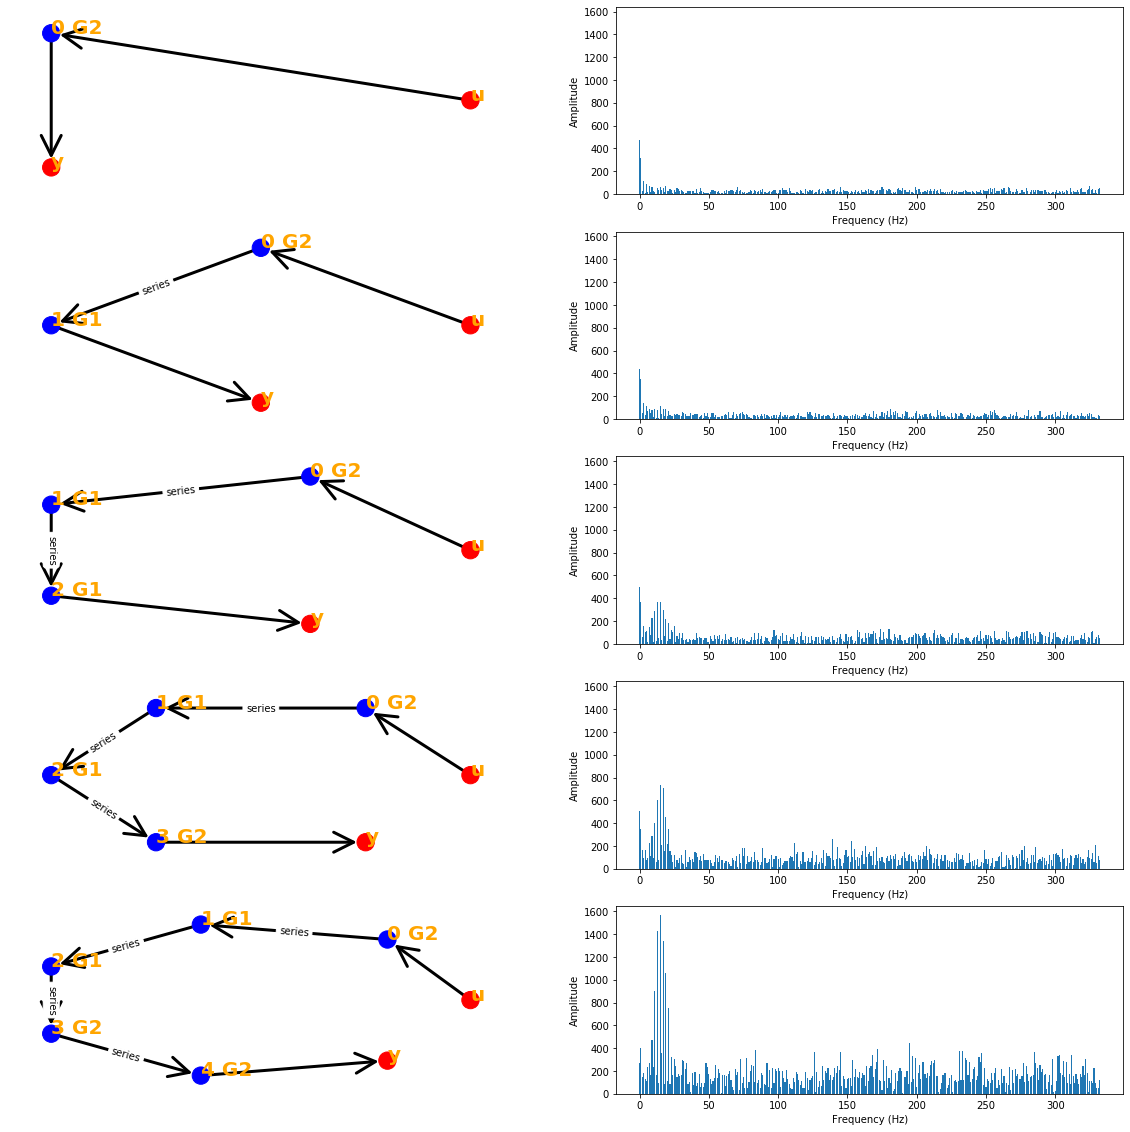

In [194]:
display(nodes, g1, g1p, g2, g2p, a, m, serialP, parallelP, feedbackP, recursionP, button)
circuits, node_descs, conn_descs = get_circuit(N, conns_p, False)
visualizeEveryStep(circuits, node_descs, conn_descs, a_noise=1, m_noise=1)

In [30]:
# def signaltonoise(a, axis=0, ddof=0):
#     a = np.asanyarray(a)
#     m = a.mean(axis)
#     sd = a.std(axis=axis, ddof=ddof)
#     return np.where(sd == 0, 0, m/sd)

# a_w, m_w = 1.0, 0.0
# x = yout.T
# a_noise = np.random.uniform(np.min(x), np.max(x), len(x))*a_w
# m_noise = np.random.normal(0, m_w, len(x))
# x_w_noise = (x+a_noise)+ x*m_noise

# print(signaltonoise(x), signaltonoise(x_w_noise))
# plt.plot(yout.T)
# plt.plot(x_w_noise)

where n is generally greater than or equal to m (for a proper transfer function).

# Prediction as a function of nodes, feedbacks

In [328]:
import networkx as nx
from random import choices

circuits = []

for conns_p in [[1, 1, 0], [1, 1, 1]]:
    for N in range(5, 55, 5):
        circuit = choice(Gs, 1, Gs_p)[0]
        n_feeds = 0
        for i in range(1, N):
            new_node = choice(Gs, 1, Gs_p)[0]
            new_conn = choices(list(conns.values()), weights=conns_p, k=1)[0] if ((1<i) and i<(N-1)) else conns[1]
            if new_conn==conns[3]:
                n_feeds = n_feeds + 1
            circuit = new_conn(circuit, new_node)
        circuits.append((N, n_feeds, circuit))

In [329]:
import networkx as nx
from random import choices

circuits = []

def get_circuit(N, conns_p, recursive=True):
    circuit = choice(Gs, p=Gs_p)
    n_feeds = 0
    
    for i in range(1, N):
        new_node = choice(Gs, p=Gs_p)
        
        if (recursive==True) and choice([True, False], p=[0.1, 0.9]):
            new_node = get_circuit(N, conns_p, False)
        
        new_conn = choice(list(conns.values()), p=conns_p) if ((1<i) and i<(N-1)) else conns[1]
        if new_conn==conns[3]:
            n_feeds = n_feeds + 1
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
        circuit = new_conn(circuit, new_node)
    return circuit
    
for conns_p in [[1, 1, 0], [1, 1, 1]]:
    conns_p = np.array(conns_p)/sum(conns_p)
    for N in range(5, 55, 5):
        circuits.append((N, n_feeds, get_circuit(N, conns_p)))

# Adding Noise + Classification

In [ ]:
import pandas as pd 

time = np.linspace(start=0, stop=100, num=1000)

G1 = tf2ss([1, 3, 1], [1, 1, 1])
G2 = tf2ss([1, 2, 1], [1, 1, 1])

A = series(G1, G2)
B = parallel(G1, G2)
C = feedback(G1, G2, sign=-1)

# u1 = [1 if (i>25) & (i<75) else 0 for i in time]
# u2 = [1 if i>50 else 0 for i in time]
# u3 = [1 if round(i, 0)%5==0 else 0 for i in time]
# u4 = [1 if round(i, 0)%50==0 else 0 for i in time]
# u5 = np.concatenate([[0]*500, [0, 1]*250])

u = np.round(np.random.uniform(low=0.0, high=1.0, size=len(time)))

X, y, a_noises, m_noises, n_nodes, n_feedbacks = [], [], [], [], [], []

for i, (n_node, n_feedback, circuit) in enumerate(tqdm(circuits)):#enumerate(tqdm([A, B, C])):
    for a_w in np.arange(0.1, 1.1, 0.1):
        for m_w in np.arange(0.1, 1.1, 0.1):
            for j in range(11):
                T, yout, xout = forced_response(circuit, time, u1)
                x = yout.T
                a_noise = np.random.normal(0, np.std(x)*a_w, len(x))
                m_noise = np.random.normal(0, m_w, len(x))
                x_w_noise = (x+a_noise)+ x*m_noise
                feat = scipy.fft.fft(x_w_noise)[:int(len(x)/2)]
                
                a_noises.append(a_w)
                m_noises.append(m_w)
                n_nodes.append(n_node)
                n_feedbacks.append(n_feedback)
                X.append(feat)
                y.append(n_feedback>0)#y.append(i)

    
X = pd.DataFrame(X).astype(float)
X['label'] = y
X['a_noise'] = a_noises
X['m_noise'] = m_noises
X['n_nodes'] = n_nodes
X['n_feedbacks'] = n_feedbacks
X = X.sample(frac=1).fillna(X.mean())

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

to_drop = ['a_noise', 'm_noise']
to_drop = ['n_nodes', 'n_feedbacks']

X_train, X_test, y_train, y_test = train_test_split(X.drop('label', axis=1), X['label'])
clf = LogisticRegression(random_state=0).fit(X_train.drop(to_drop, axis=1), y_train)
preds = clf.predict(X_test.drop(to_drop, axis=1))
print(classification_report(y_test, preds))#, target_names=['A. Serial', 'B. Parallel', 'C. Feedback']))

              precision    recall  f1-score   support

       False       0.49      1.00      0.66      2711
        True       0.00      0.00      0.00      2789

    accuracy                           0.49      5500
   macro avg       0.25      0.50      0.33      5500
weighted avg       0.24      0.49      0.33      5500



In [269]:
y_train.value_counts()

False    8289
True     8211
Name: label, dtype: int64

In [239]:
# results = []
# for a_noise in X['a_noise'].unique():
#     for m_noise in X['m_noise'].unique():
#         f_map = (X_test['a_noise']==a_noise) & (X_test['m_noise']==m_noise)
#         if f_map.sum()==0:
#             continue
#         filtered= X_test.loc[f_map]
#         preds = clf.predict(filtered.drop(['a_noise', 'm_noise'], axis=1))
#         results.append((a_noise, m_noise, accuracy_score(y_test[f_map], preds)))
# results = pd.DataFrame(results)
# results.columns = ['a_noise', 'm_noise', 'acc']
# pivoted = results.pivot(index='m_noise', columns='a_noise', values='acc')

In [264]:
results = []
for n_node in X['n_nodes'].unique():
    for n_feedback in X['n_feedbacks'].unique():
        f_map = (X_test['n_nodes']==n_node) & (X_test['n_feedbacks']==n_feedback)
        if f_map.sum()==0:
            continue
        filtered= X_test.loc[f_map]
        preds = clf.predict(filtered.drop(['n_nodes', 'n_feedbacks'], axis=1))
        results.append((n_node, n_feedback, accuracy_score(y_test[f_map], preds)))
results = pd.DataFrame(results)
results.columns = ['n_nodes', 'n_feedbacks', 'acc']
pivoted = results.pivot(index='n_feedbacks', columns='n_nodes', values='acc')

In [180]:
# fig = plt.figure()
# ax = fig.gca()
# a = ax.imshow(pivoted.values);
# ax.set_xlabel("# Nodes");# 'Additive Noise');
# ax.set_ylabel("# Feedbacks");#'Multiplicative Noise');
# ax.set_yticks(range(pivoted.shape[0]));
# ax.set_xticks(range(pivoted.shape[1]));
# ax.set_yticklabels(np.round(pivoted.index.values, 2));
# ax.set_xticklabels(np.round(pivoted.columns.values, 2));
# ax.xaxis.tick_top()
# fig.colorbar(a);
# ax.xaxis.set_label_position('top') ;
# plt.title('Classification accuracy as a function of Architecture (process noise + recursive)\n');

In [179]:
# results = pd.read_csv('additive_multiplicative_noise.csv', index_col=0)
# fig = plt.figure()
# ax = fig.gca()
# a = ax.imshow(results.values);
# ax.set_xlabel('Additive Noise');
# ax.set_ylabel('Multiplicative Noise');
# ax.set_yticks(range(results.shape[0]));
# ax.set_xticks(range(results.shape[1]));
# ax.set_yticklabels(results.index.values);
# ax.set_xticklabels(results.columns.values);
# ax.xaxis.tick_top()
# fig.colorbar(a);
# ax.xaxis.set_label_position('top') ;
# plt.title('Classification accuracy as a function of noise\n');

In [178]:
# results = pd.read_csv('snr_complexity.csv', index_col=0)
# fig = plt.figure()
# ax = fig.gca()
# a = ax.imshow(results);
# ax.set_xlabel('Feedback loops');
# ax.set_ylabel('Noise');
# ax.set_xticks(range(results.shape[1]));
# ax.set_yticks(range(results.shape[0]));
# ax.set_xticklabels(results.columns);
# ax.set_yticklabels(results.index);
# ax.xaxis.tick_top()
# fig.colorbar(a);
# ax.xaxis.set_label_position('top') ;
# plt.title();

In [398]:
# results = pd.read_csv('mixed_us_gs.csv', index_col=0);
# plt.imshow(results);
# plt.colorbar();
# plt.xlabel('Number of different transfer functions');
# plt.ylabel('Number of different stimuli');

In [366]:
# results = pd.read_csv('mixed_us.csv', index_col=0);

In [367]:
# plt.imshow(results);
# plt.colorbar();
# plt.xlabel('Number of different stimuli');
# plt.ylabel('Feedback loops in connectivity');

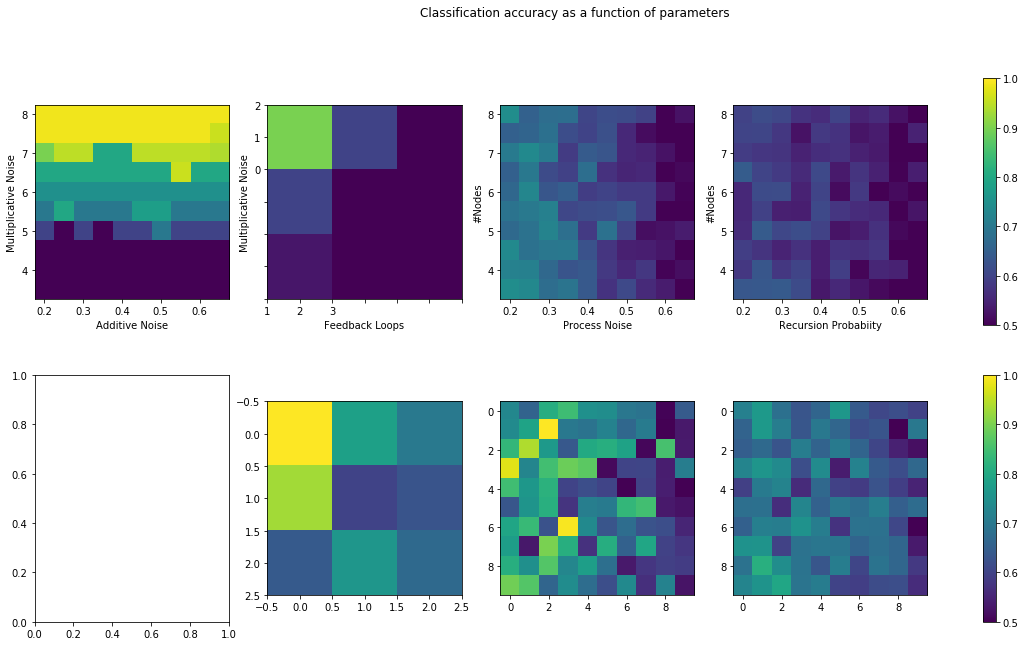

In [99]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

data = ['only_recursion.csv', 'process_noise.csv', 'snr_complexity.csv', 'additive_multiplicative_noise.csv']

axis_labels = [('Recursion Probabiity', '#Nodes'),\
               ('Process Noise', '#Nodes'),\
               ('Feedback Loops', 'Multiplicative Noise'),\
               ('Additive Noise', 'Multiplicative Noise'),]

titles =['recursive structure\n',\
         'PROCESS noise\n',\
         'complexity and noise\n',\
         'noise\n']

for i, (csv, labels, title) in enumerate(list(zip(data, axis_labels, titles))[::-1]):
    results = pd.read_csv(csv, index_col=0)
    a = axs[0][i].imshow(results.values, vmin=0.5, vmax=1);
    axs[0][i].set_xlabel(labels[0]);
    axs[0][i].set_ylabel(labels[1]);
    axs[0][i].set_yticklabels(range(results.shape[0])[::-1]);
    axs[0][i].set_xticklabels(results.columns.values);
    axs[0][i].xaxis.tick_bottom()
#     fig.colorbar(a, ax=axs[i]);
    axs[0][i].xaxis.set_label_position('bottom') ;
#     axs[i].set_title(title);

dnn_recursion = pd.read_csv('only_recursion_dnn.csv', header=0, index_col=0)
dnn_process   = pd.read_csv('process_noise_dnn.csv', header=0, index_col=0)
dnn_loops     = pd.read_csv('snr_complexity_dnn.csv', header=0, index_col=0)
axs[1][3].imshow(dnn_recursion, vmin=0.5, vmax=1)
axs[1][2].imshow(dnn_process, vmin=0.5, vmax=1)
axs[1][1].imshow(dnn_loops, vmin=0.5, vmax=1)


fig.colorbar(a, ax=axs[0].ravel().tolist())
fig.colorbar(a, ax=axs[1].ravel().tolist())
fig.suptitle('Classification accuracy as a function of parameters');